In [48]:
import pandas as pd
from sys import getsizeof
import numpy as np

In [155]:
path_files = ['../data/data_2017-09-1_2017-09-1.csv', 
              '../data/data_2017-09-2_2017-09-2.csv',
              '../data/data_2017-10-1_2017-10-1.csv',
              '../data/data_2017-10-2_2017-10-2.csv',
              '../data/data_2017-10-3_2017-10-3.csv',
              '../data/data_2017-10-4_2017-10-4.csv']
cols = ['payload.pull_request.base.repo.language', 'actor.id', 'created_at']

In [82]:
df = pd.DataFrame()
for p in path_files:
    df = pd.concat([df, pd.read_csv(p)[cols]])

In [83]:
langues = df['payload.pull_request.base.repo.language'].unique()
# langues = langues[0:10]

In [80]:
d = np.zeros((len(langues), len(langues)))

for i, l1 in enumerate(langues):
    for j, l2 in enumerate(langues):
        unique_actors_l1 = set(df[
            df['payload.pull_request.base.repo.language']==l1]
                            ['actor.id'])
        unique_actors_l2 = set(df[
            df['payload.pull_request.base.repo.language']==l2]
                            ['actor.id'])
        
        d[i, j] = (len(unique_actors_l1.intersection(unique_actors_l2)) / len(unique_actors_l2))

In [81]:
network = pd.DataFrame(d, columns=langues, index=langues)

In [82]:
network['JavaScript'].sort_values(ascending=False).head()

JavaScript    1.000000
HTML          0.034687
CSS           0.020539
Python        0.019283
Java          0.012780
Name: JavaScript, dtype: float64

In [83]:
network['Python'].sort_values(ascending=False).head()

Python        1.000000
JavaScript    0.034788
HTML          0.023466
Shell         0.020379
C++           0.016879
Name: Python, dtype: float64

In [84]:
network['Java'].sort_values(ascending=False).head()

Java          1.000000
JavaScript    0.027119
HTML          0.015738
Python        0.015254
Shell         0.011380
Name: Java, dtype: float64

In [85]:
network['Go'].sort_values(ascending=False).head()

Go            1.000000
JavaScript    0.034789
Python        0.032568
Shell         0.029608
Java          0.020725
Name: Go, dtype: float64

In [86]:
network['Scala'].sort_values(ascending=False).head()

Scala         1.000000
JavaScript    0.030588
Java          0.030588
Python        0.018824
CSS           0.016471
Name: Scala, dtype: float64

In [87]:
network['Elixir'].sort_values(ascending=False).head()

Elixir    1.000000
Ruby      0.027027
HTML      0.020270
CSS       0.020270
Shell     0.020270
Name: Elixir, dtype: float64

In [21]:
from graph_tool.all import *

ModuleNotFoundError: No module named 'graph_tool'

In [ ]:
df['payload.pull_request.base.repo.language'].unique()

In [10]:
df.groupby('payload.pull_request.base.repo.language')

AttributeError: 'DataFrameGroupBy' object has no attribute 'unique'

In [11]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
g = nx.Graph()

In [16]:
g.add_node('Scala')
g.add_nodes_from(range(1,10))

In [17]:
g.graph

{}

In [27]:
import timeit

%timeit df[df['payload.pull_request.base.repo.language']=='Scala']
%timeit df[df['payload.pull_request.base.repo.language']=='Scala']['actor.id'].unique()

6.37 ms ± 239 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
6.57 ms ± 801 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
6.52 ms ± 384 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [30]:
df = df.set_index('payload.pull_request.base.repo.language')

In [33]:
%timeit df.loc['Scala']

1.38 ms ± 49.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
%timeit df[df['payload.pull_request.base.repo.language']=='Scala']

In [ ]:
d = np.zeros((len(langues), len(langues)))

for i, l1 in enumerate(langues):
    for j, l2 in enumerate(langues):
        unique_actors_l1 = set(df[
            df['payload.pull_request.base.repo.language']==l1]
                            ['actor.id'])
        unique_actors_l2 = set(df[
            df['payload.pull_request.base.repo.language']==l2]
                            ['actor.id'])
        
        d[i, j] = (len(unique_actors_l1.intersection(unique_actors_l2)) / len(unique_actors_l2))

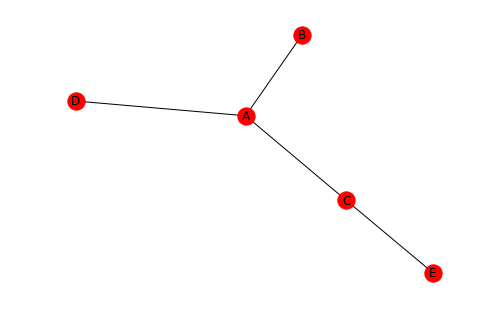

In [18]:
df = pd.DataFrame({ 'from':['A', 'B', 'C','A'], 'to':['D', 'A', 'E','C']})
df
 
# Build your graph
G=nx.from_pandas_dataframe(df, 'from', 'to')
 
# Plot it
nx.draw(G, with_labels=True)
plt.show()


In [118]:
from itertools import combinations

In [156]:
path_files = ['../data/data_2017-09-1_2017-09-1.csv', 
              '../data/data_2017-09-2_2017-09-2.csv',
              '../data/data_2017-10-1_2017-10-1.csv',
              '../data/data_2017-10-2_2017-10-2.csv',
              '../data/data_2017-10-3_2017-10-3.csv',
              '../data/data_2017-10-4_2017-10-4.csv']

In [157]:
df = pd.DataFrame()
for p in path_files:
    df = pd.concat([df, pd.read_csv(p)[cols]])

In [134]:
comb = list(combinations(langues, r=2)) + list(zip(langues, langues))
counts = df['payload.pull_request.base.repo.language'].value_counts()
langues = list(counts[counts > 10].index)
df = df.set_index('payload.pull_request.base.repo.language')

common = []

for i, (l1, l2) in enumerate(comb):
    unique_actors_l1 = pd.Series(df.loc[l1]['actor.id']).unique()
    unique_actors_l2 = pd.Series(df.loc[l2]['actor.id']).unique()
    same_actors = len(set(unique_actors_l1) & set(unique_actors_l2))
    common.append((l1, l2, same_actors))
network = pd.DataFrame(common, columns=['language1', 'language2', 'common_actors'])

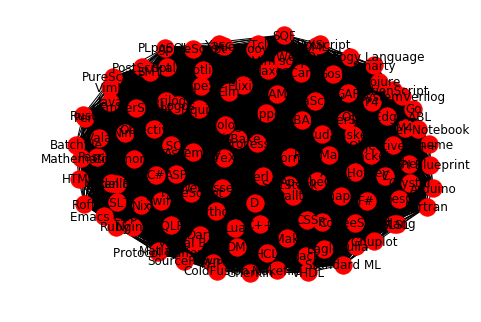

In [136]:
# Build your graph
G=nx.from_pandas_dataframe(network, 'language1', 'language2', 'common_actors')
 
# Plot it
nx.draw(G, with_labels=True)
plt.show()

In [129]:
G.node

NodeView(('JavaScript', 'Python', 'Java', 'HTML', 'Ruby', 'PHP', 'C++', 'C#', 'Go', 'TypeScript', 'CSS', 'C', 'Shell', 'Swift', 'Scala', 'PowerShell', 'Rust', 'Objective-C', 'Jupyter Notebook', 'DM', 'Lua', 'Kotlin', 'R', 'Elixir', 'Perl', 'Makefile', 'Vue', 'Haskell', 'Groovy', 'Julia', 'Clojure', 'CoffeeScript', 'TeX', 'OCaml', 'Dart', 'CMake', 'Nix', 'HCL', 'Vim script', 'XSLT', 'Arduino', 'Matlab', 'Smarty', 'Emacs Lisp', 'F#', 'Erlang', 'Puppet', 'Fortran', 'Visual Basic', 'PLpgSQL', 'SaltStack', 'Assembly', 'Roff', 'Gherkin', 'Crystal', 'Tcl', 'Pascal', 'Haxe', 'D', 'Modelica', 'Elm', 'ColdFusion', 'Batchfile', 'Vala', 'FreeMarker', 'PureScript', 'Common Lisp', 'MAXScript', 'SQF', 'PLSQL', 'Smalltalk', 'Protocol Buffer', 'Apex', 'Perl 6', 'Mathematica', 'QML', 'ApacheConf', 'BitBake', 'Web Ontology Language', 'Liquid', 'Chapel', 'Eagle', 'Racket', 'ASP', 'nesC', 'Prolog', 'Processing', 'Verilog', 'GAP', 'Nim', 'Nginx', 'Standard ML', 'PostScript', 'AutoHotkey', 'SMT', 'M4', 'Gosu

In [149]:
x = '2017-08-08'

In [150]:
'-'.join(x.split('-')[0:-1] + [('-' + x.split('-')[-1]).replace('-0', '')])

'2017-08-8'

In [ ]:
x.split('-')[-1]

In [158]:
df['cohort'] = pd.to_datetime(df['created_at']).apply(lambda x: x.strftime('%Y-%m'))

In [159]:
df['cohort'].unique()

array(['2017-09', '2017-10'], dtype=object)

In [161]:
counts = df['payload.pull_request.base.repo.language'].value_counts()

In [165]:
counts.iloc[0:20].index

Index(['JavaScript', 'Python', 'Java', 'HTML', 'Ruby', 'PHP', 'C++', 'C#',
       'Go', 'TypeScript', 'CSS', 'C', 'Shell', 'Swift', 'Scala', 'PowerShell',
       'Rust', 'Objective-C', 'Jupyter Notebook', 'DM'],
      dtype='object')

In [167]:
df[df['payload.pull_request.base.repo.language'].apply(lambda x: x in counts.iloc[0:20].index)]

,payload.pull_request.base.repo.language,actor.id,created_at,cohort
0,PHP,8322674,2017-09-01T00:00:09Z,2017-09
1,Shell,22301063,2017-09-01T00:00:16Z,2017-09
2,C#,13976695,2017-09-01T00:00:18Z,2017-09
3,Rust,967877,2017-09-01T00:00:19Z,2017-09
4,JavaScript,29139614,2017-09-01T00:00:23Z,2017-09
5,C#,27025973,2017-09-01T00:00:24Z,2017-09
6,Rust,378677,2017-09-01T00:00:28Z,2017-09
7,Ruby,6148072,2017-09-01T00:00:31Z,2017-09
9,HTML,28666458,2017-09-01T00:00:49Z,2017-09
11,Java,726145,2017-09-01T00:00:50Z,2017-09
